In [ ]:
 import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalized
train_images, test_images = train_images / 255.0, test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'truck', 'cat', 'dog', 'deer', 'ship', 'frog', 'horse']

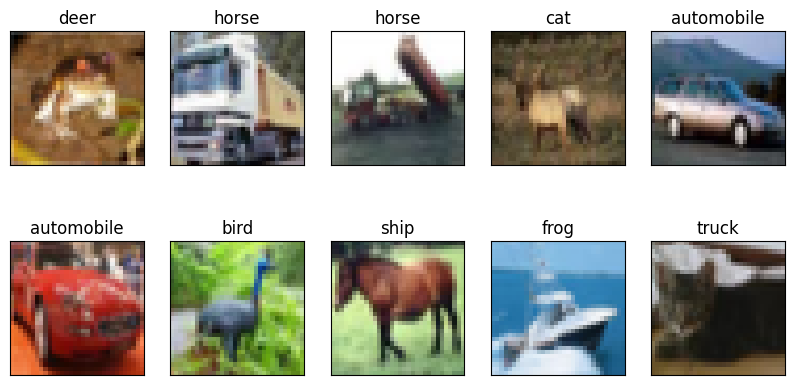

In [ ]:

plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#model architecture- way-1
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,330 (485.66 KB)

 Trainable params: 124,330 (485.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#model architecture- way-2
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,330 (485.66 KB)

 Trainable params: 124,330 (485.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = optimizers.Adam()

model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

history = model.fit(train_images,train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 54ms/step - accuracy: 0.3315 - loss: 1.7929 - val_accuracy: 0.5258 - val_loss: 1.2896
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 47ms/step - accuracy: 0.5716 - loss: 1.2048 - val_accuracy: 0.6017 - val_loss: 1.1178
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.6334 - loss: 1.0337 - val_accuracy: 0.6171 - val_loss: 1.0895
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6777 - loss: 0.9215 - val_accuracy: 0.6702 - val_loss: 0.9269
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.7083 - loss: 0.8322 - val_accuracy: 0.6757 - val_loss: 0.9224
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7226 - loss: 0.7775 - val_accuracy: 0.6844 - val_loss: 0.8931
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7432 - loss: 0.7298 - val_accuracy: 0.6991 - val_loss: 0.8741
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.7643 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 6s - 18ms/step - accuracy: 0.7006 - loss: 0.9185
Test accuracy: 0.7006000280380249


In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()
train_labels= lb.fit_transform(test_labels)
test_labels = lb.transform(test_labels)
predictions = model.predict(test_images, batch_size=128)

print(classification_report(test_labels.argmax(axis=1),
                          predictions.argmax(axis=1),
                          target_names=[str(x) for x in lb.classes_]))


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1000
           1       0.83      0.84      0.83      1000
           2       0.56      0.65      0.60      1000
           3       0.62      0.35      0.45      1000
           4       0.64      0.67      0.65      1000
           5       0.58      0.68      0.63      1000
           6       0.87      0.63      0.73      1000
           7       0.72      0.78      0.75      1000
           8       0.78      0.84      0.81      1000
           9       0.79      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



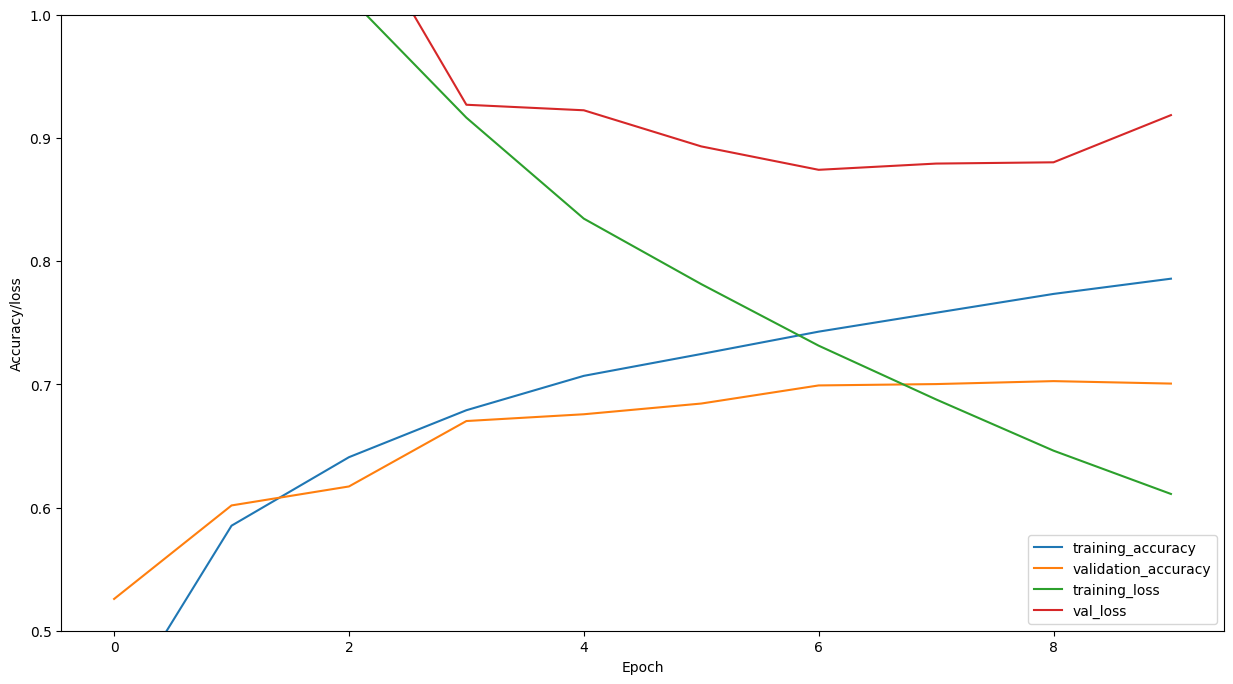

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation_accuracy')
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')